In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2277,3571-RFHAR,Male,0,No,No,65,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,109.15,6941.2,Yes
2635,9953-ZMKSM,Male,0,No,No,63,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1559.3,No
6487,5998-DZLYR,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),94.35,5703,No
2402,7623-HKYRK,Male,0,No,Yes,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.70,111.65,No
4838,1360-XFJMR,Female,0,Yes,No,67,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),109.70,7344.45,No


In [3]:
#Check the data types
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.drop('customerID',axis='columns',inplace=True) #drop customer ID

In [5]:
df.TotalCharges.values  #check the datatype, need the numerical values as float type (numeric)

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.MonthlyCharges.values


array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
pd.to_numeric(df.TotalCharges)

#can't be executed as there are some empty spaces(for example: "NA'") in that column

ValueError: Unable to parse string " " at position 488

In [8]:
#the below line of code is essentially checking if the 'TotalCharges' column contains non-numeric values

pd.to_numeric(df.TotalCharges,errors='coerce').isnull()  
#The errors='coerce' parameter tells pandas to coerce errors to NaN (Not a Number) values if any conversion error occurs.
#.isnull(): After converting the values to numeric format, this code checks for null values (for example: row 488 is null).

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df.shape

(7043, 20)

In [10]:
# 488th row for TotalCharges has nothing, to check this

df.iloc[488].TotalCharges

' '

In [11]:
#Assigning a new matrix containing available values for TotalCharges

df1 = df[df.TotalCharges!=' ']
df1.shape  #11 rows having 'NA' are deleted

(7032, 20)

In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges) #converted into numeric (float) excluding NAN so that numerical operations can be performed
df1.TotalCharges.values

C:\Users\abmasud\.conda\envs\masud\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [14]:
df1.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

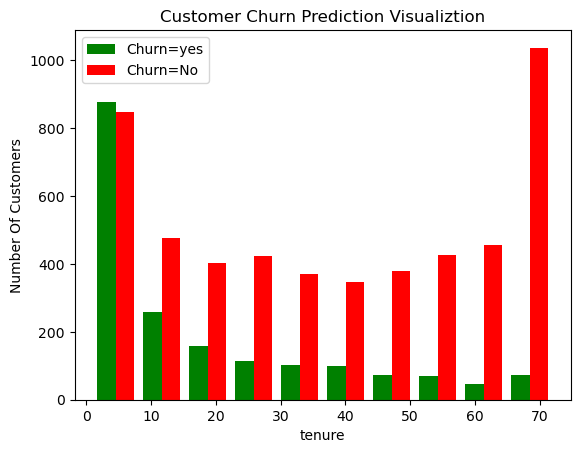

In [15]:
# identify Churn_no and Churn_yes based on tenure 
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=yes','Churn=No'])
plt.legend()

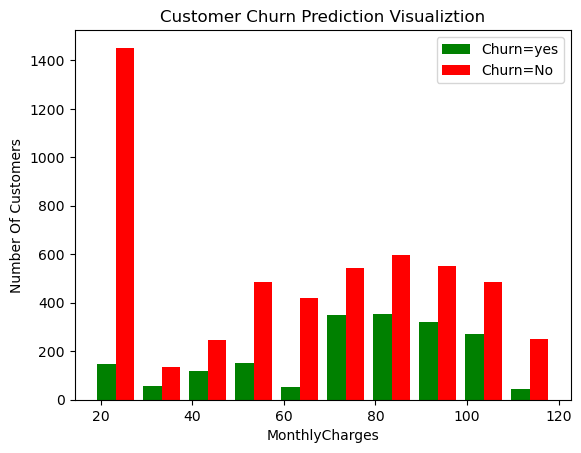

In [16]:
# identify Churn_no and Churn_yes based on Monthly Charges
MC_no=df1[df1.Churn=='No'].MonthlyCharges
MC_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([MC_yes,MC_no],color=['green','red'],label=['Churn=yes','Churn=No'])
plt.legend()

In [17]:
def print_unique_col_values(df): #making a fuinction so that I can get the unique values of each column for object datatype
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}') #print the unique value of each column

In [18]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [19]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\abmasud\.conda\envs\masud\lib\site-packages\pandas\core\frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [20]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True) #replace with binary data

C:\Users\abmasud\.conda\envs\masud\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [22]:
print_unique_col_values(df1)


gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [23]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [24]:
df1['gender'] = df1['gender'].map({'Female': 0, 'Male': 1})

C:\Users\abmasud\.conda\envs\masud\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df1.gender.unique()

array([0, 1], dtype=int64)

In [26]:
#The get_dummies() function converts each unique value in the specified categorical columns into a new binary column, where each column represents one unique value.
#type needs to be iun int or float to do numerical calculation
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [27]:
for col in df2:
    print(f'{col}:{df1[col].unique()}')

gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
PaperlessBilling:[1 0]
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


KeyError: 'InternetService_DSL'

In [28]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler #imports the MinMaxScaler class from the scikit-learn preprocessing module. The MinMaxScaler scales features to a specified range (by default, between 0 and 1).
scaler=MinMaxScaler()#Initialize MinMaxScaler
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale]) # The fit_transform() method calculates the minimum and maximum values of each column and scales the data accordingly. Finally, it replaces the original values in the selected columns with the scaled values.

In [29]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [30]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [31]:
X_train.shape

(5625, 26)

In [32]:
X_train[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,0,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,1,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,0,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,1,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0


In [33]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

In [34]:
X_test.shape

(1407, 26)

In [35]:
import tensorflow as tf
from tensorflow import keras

import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)


C:\Users\abmasud\.conda\envs\masud\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\abmasud\.conda\envs\masud\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\abmasud\.conda\envs\masud\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\abmasud\.conda\envs\masud\lib\site-packages\tensorflow\python\frame

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\abmasud\.conda\envs\masud\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\abmasud\.conda\envs\masud\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\abmasud\.conda\envs\masud\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\abmasud\.conda\envs\masud\lib\site-packages\te

Epoch 1/100
5625/5625 [==============================] - 0s 41us/sample - loss: 0.5010 - acc: 0.7518
Epoch 2/100
5625/5625 [==============================] - 0s 23us/sample - loss: 0.4219 - acc: 0.7982
Epoch 3/100
5625/5625 [==============================] - 0s 23us/sample - loss: 0.4177 - acc: 0.8023
Epoch 4/100
5625/5625 [==============================] - 0s 23us/sample - loss: 0.4156 - acc: 0.8028
Epoch 5/100
5625/5625 [==============================] - 0s 23us/sample - loss: 0.4138 - acc: 0.8043
Epoch 6/100
5625/5625 [==============================] - 0s 22us/sample - loss: 0.4120 - acc: 0.8076
Epoch 7/100
5625/5625 [==============================] - 0s 23us/sample - loss: 0.4109 - acc: 0.8055
Epoch 8/100
5625/5625 [==============================] - 0s 23us/sample - loss: 0.4101 - acc: 0.8071
Epoch 9/100
5625/5625 [==============================] - 0s 23us/sample - loss: 0.4080 - acc: 0.8108
Epoch 10/100
5625/5625 [==============================] - 0s 22us/sample - loss: 0.4078 - a

In [36]:
model.evaluate(X_test,y_test)

1407/1407 [==============================] - 0s 23us/sample - loss: 0.5114 - acc: 0.7662


[0.5114395369344683, 0.76616913]

In [37]:
yp=model.predict(X_test)
yp[:5]

array([[0.16671479],
       [0.6983364 ],
       [0.00314212],
       [0.6387346 ],
       [0.3757848 ]], dtype=float32)

In [38]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
    

In [39]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [40]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [41]:
y_test[:10]
y_pred=np.array(y_pred)


In [42]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       999
           1       0.61      0.53      0.57       408

    accuracy                           0.77      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.76      0.77      0.76      1407



In [43]:
y_test.shape

(1407,)

In [44]:
y_test.shape

(1407,)

In [45]:
y_pred.shape

(1407,)

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf

# Assuming cm is a TensorFlow tensor
sess = tf.compat.v1.Session()  # Create a TensorFlow session
with sess.as_default():
    cm_np = cm.eval()  # Evaluate the tensor to get a NumPy array

# Create heatmap
plt.figure(figsize=(10, 7))
sn.heatmap(cm_np, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


NameError: name 'cm' is not defined

# Method 1: Undersample

In [ ]:
 #handling the imbalance data; y_test values 1 has 408 times, 0 has 999 times
   
 #class count
count_class_0,count_class_1=df1.Churn.value_counts()

#Divide by class

df_class_0=df2[df2['Churn']== 0]
df_class_1=df2[df2['Churn']== 1]  

In [ ]:
count_class_0,count_class_1 # 5163 number of 0's and 1869 numbers of 1

In [ ]:
df_class_0.shape

In [ ]:
df_class_1.shape

In [ ]:
df_class_0.sample(count_class_1).shape  #making the same size as df_class_1 as we want to have the same numbers of 0 and 1 to handle imbalance

In [ ]:
#we have to combine the same size of 0 and 1 together

df_class_0_under=df_class_0.sample(count_class_1)
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0) #this contains balance sample having same size of 1 and 0
df_test_under.shape

In [ ]:
X=df_test_under.drop('Churn',axis='columns')
y=df_test_under['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15, stratify=y) #stratify will assure same number of 0 and 1 in both X_tratin and X_test


In [ ]:
y_train.value_counts() #same number of 0 and 1

In [ ]:
y_test.value_counts()#same number of 0 and 1

In [ ]:
X_train.shape

In [ ]:
from tensorflow_addons import losses

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [67]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [68]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

#due to balance set, the precision, recall, and F-score for 1-class has increased

Epoch 1/100
8260/8260 [==============================] - 0s 32us/sample - loss: 0.5211 - acc: 0.7500
Epoch 2/100
8260/8260 [==============================] - 0s 22us/sample - loss: 0.4616 - acc: 0.7820
Epoch 3/100
8260/8260 [==============================] - 0s 23us/sample - loss: 0.4538 - acc: 0.7858
Epoch 4/100
8260/8260 [==============================] - 0s 22us/sample - loss: 0.4496 - acc: 0.7869
Epoch 5/100
8260/8260 [==============================] - 0s 23us/sample - loss: 0.4436 - acc: 0.7927
Epoch 6/100
8260/8260 [==============================] - 0s 22us/sample - loss: 0.4397 - acc: 0.7930
Epoch 7/100
8260/8260 [==============================] - 0s 22us/sample - loss: 0.4369 - acc: 0.7971
Epoch 8/100
8260/8260 [==============================] - 0s 23us/sample - loss: 0.4317 - acc: 0.8000
Epoch 9/100
8260/8260 [==============================] - 0s 23us/sample - loss: 0.4293 - acc: 0.8028
Epoch 10/100
8260/8260 [==============================] - 0s 23us/sample - loss: 0.4252 - a

# Method2: Oversampling

In [ ]:
count_class_0, count_class_1

In [ ]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)# increasing the numbers in class 1 same as the size of 0
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)#combining the daratsets
df_test_over.shape

In [ ]:
df_class_0.shape

In [ ]:
print(df_test_over.Churn.value_counts())

In [ ]:
X=df_test_over.drop('Churn',axis='columns')
y=df_test_over['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15, stratify=y) #stratify will assure same number of 0 and 1 in both X_tratin and X_test


In [ ]:
y_train.value_counts() #checking if we have same number of 0 and 1 in y_train

In [ ]:
y_test.value_counts()#checking if we have same number of 0 and 1 in y_test

In [70]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
8260/8260 [==============================] - 0s 35us/sample - loss: 0.5235 - acc: 0.7431
Epoch 2/100
8260/8260 [==============================] - 0s 25us/sample - loss: 0.4686 - acc: 0.7732
Epoch 3/100
8260/8260 [==============================] - 0s 24us/sample - loss: 0.4595 - acc: 0.7824
Epoch 4/100
8260/8260 [==============================] - 0s 24us/sample - loss: 0.4550 - acc: 0.7821
Epoch 5/100
8260/8260 [==============================] - 0s 24us/sample - loss: 0.4502 - acc: 0.7863
Epoch 6/100
8260/8260 [==============================] - 0s 25us/sample - loss: 0.4449 - acc: 0.7914
Epoch 7/100
8260/8260 [==============================] - 0s 24us/sample - loss: 0.4396 - acc: 0.7937
Epoch 8/100
8260/8260 [==============================] - 0s 24us/sample - loss: 0.4346 - acc: 0.7996
Epoch 9/100
8260/8260 [==============================] - 0s 24us/sample - loss: 0.4309 - acc: 0.8013
Epoch 10/100
8260/8260 [==============================] - 0s 25us/sample - loss: 0.4273 - a

# Method 3:SMOTE

In [49]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [62]:
import imblearn

from imblearn.over_sampling import SMOTE

# Initialize SMOTE object
smote = SMOTE(sampling_strategy='minority')

# Fit and resample the data
X_sm, y_sm = smote.fit_resample(X, y)

# Check the value counts of the resampled data
y_sm.value_counts()


0    5163
1    5163
Name: Churn, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [65]:
# Number of classes in training Data
y_train.value_counts() #checking balance

1    4130
0    4130
Name: Churn, dtype: int64

#How SMOTE Works:

SMOTE tackles this problem by creating synthetic data points for the minority class. Here's the basic idea:

Identify the minority class: The algorithm first identifies the class with the fewest data points.
Select a data point from the minority class: SMOTE randomly selects a data point from the minority class.
Find its nearest neighbors: The algorithm identifies the k-nearest neighbors (similar data points) of the chosen data point within the minority class.
Synthesize new data points: SMOTE randomly selects one of the k-nearest neighbors and creates a new data point along the line segment between the original data point and its neighbor. This new data point represents a synthetic example similar to the minority class.

In [69]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
8260/8260 [==============================] - 0s 35us/sample - loss: 0.5330 - acc: 0.7364
Epoch 2/100
8260/8260 [==============================] - 0s 24us/sample - loss: 0.4647 - acc: 0.7812
Epoch 3/100
8260/8260 [==============================] - 0s 23us/sample - loss: 0.4556 - acc: 0.7863
Epoch 4/100
8260/8260 [==============================] - 0s 23us/sample - loss: 0.4490 - acc: 0.7897
Epoch 5/100
8260/8260 [==============================] - 0s 23us/sample - loss: 0.4430 - acc: 0.7943
Epoch 6/100
8260/8260 [==============================] - 0s 23us/sample - loss: 0.4391 - acc: 0.8007
Epoch 7/100
8260/8260 [==============================] - 0s 23us/sample - loss: 0.4354 - acc: 0.8011
Epoch 8/100
8260/8260 [==============================] - 0s 23us/sample - loss: 0.4302 - acc: 0.8041
Epoch 9/100
8260/8260 [==============================] - 0s 23us/sample - loss: 0.4281 - acc: 0.8080
Epoch 10/100
8260/8260 [==============================] - 0s 23us/sample - loss: 0.4246 - a

# Method4: Use of Ensemble with undersampling

In [72]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [74]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [78]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [89]:
df3=X_train.copy()
df3['Churn']=y_train

df3_class_0=df3[df3['Churn']== 0]
df3_class_1=df3[df3['Churn']== 1]  

In [90]:
df3_class_0.shape,df3_class_1.shape

((4130, 27), (1495, 27))

In [91]:
df3_class_0[:1495].shape

(1495, 27)

In [92]:
df_train=pd.concat([df3_class_0[:1495],df3_class_1],axis=0)
df_train.shape

(2990, 27)

In [96]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    X_train=df_train.drop('Churn',axis='columns')
    y_train=df_train.Churn
    return X_train,y_train

In [98]:
X_train,y_train= get_train_batch(df3_class_0,df3_class_1,0,1495)
X_train.shape  #combines df3_class_0 and df3_class_1, but each having 1495 (starting from 0 to 1495 for X_train) 

(2990, 26)

In [99]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
2990/2990 [==============================] - 0s 67us/sample - loss: 0.5984 - acc: 0.7114
Epoch 2/100
2990/2990 [==============================] - 0s 23us/sample - loss: 0.5177 - acc: 0.7538
Epoch 3/100
2990/2990 [==============================] - 0s 22us/sample - loss: 0.4969 - acc: 0.7659
Epoch 4/100
2990/2990 [==============================] - 0s 23us/sample - loss: 0.4876 - acc: 0.7712
Epoch 5/100
2990/2990 [==============================] - 0s 22us/sample - loss: 0.4807 - acc: 0.7716
Epoch 6/100
2990/2990 [==============================] - 0s 22us/sample - loss: 0.4783 - acc: 0.7686
Epoch 7/100
2990/2990 [==============================] - 0s 22us/sample - loss: 0.4752 - acc: 0.7746
Epoch 8/100
2990/2990 [==============================] - 0s 22us/sample - loss: 0.4727 - acc: 0.7712
Epoch 9/100
2990/2990 [==============================] - 0s 23us/sample - loss: 0.4713 - acc: 0.7779
Epoch 10/100
2990/2990 [==============================] - 0s 22us/sample - loss: 0.4679 - a

In [100]:
X_train,y_train= get_train_batch(df3_class_0,df3_class_1,1495,1495*2) #X_train from 1495 to 2990
X_train.shape

(2990, 26)

In [101]:
y_preds2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
2990/2990 [==============================] - 0s 53us/sample - loss: 0.6220 - acc: 0.6819
Epoch 2/100
2990/2990 [==============================] - 0s 24us/sample - loss: 0.5129 - acc: 0.7545
Epoch 3/100
2990/2990 [==============================] - 0s 23us/sample - loss: 0.4932 - acc: 0.7575
Epoch 4/100
2990/2990 [==============================] - 0s 24us/sample - loss: 0.4853 - acc: 0.7615
Epoch 5/100
2990/2990 [==============================] - 0s 23us/sample - loss: 0.4817 - acc: 0.7642
Epoch 6/100
2990/2990 [==============================] - 0s 23us/sample - loss: 0.4784 - acc: 0.7656
Epoch 7/100
2990/2990 [==============================] - 0s 23us/sample - loss: 0.4766 - acc: 0.7635
Epoch 8/100
2990/2990 [==============================] - 0s 23us/sample - loss: 0.4732 - acc: 0.7672
Epoch 9/100
2990/2990 [==============================] - 0s 24us/sample - loss: 0.4712 - acc: 0.7746
Epoch 10/100
2990/2990 [==============================] - 0s 24us/sample - loss: 0.4692 - a

In [102]:
X_train,y_train= get_train_batch(df3_class_0,df3_class_1,1495*2,4130) #X_train from o 2990 to 4130
X_train.shape

(2635, 26)

In [103]:
y_preds3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
2635/2635 [==============================] - 0s 58us/sample - loss: 0.6352 - acc: 0.6558
Epoch 2/100
2635/2635 [==============================] - 0s 24us/sample - loss: 0.5109 - acc: 0.7594
Epoch 3/100
2635/2635 [==============================] - 0s 24us/sample - loss: 0.4882 - acc: 0.7674
Epoch 4/100
2635/2635 [==============================] - 0s 24us/sample - loss: 0.4817 - acc: 0.7693
Epoch 5/100
2635/2635 [==============================] - 0s 23us/sample - loss: 0.4769 - acc: 0.7696
Epoch 6/100
2635/2635 [==============================] - 0s 23us/sample - loss: 0.4757 - acc: 0.7738
Epoch 7/100
2635/2635 [==============================] - 0s 23us/sample - loss: 0.4713 - acc: 0.7753
Epoch 8/100
2635/2635 [==============================] - 0s 23us/sample - loss: 0.4692 - acc: 0.7772
Epoch 9/100
2635/2635 [==============================] - 0s 24us/sample - loss: 0.4688 - acc: 0.7769
Epoch 10/100
2635/2635 [==============================] - 0s 24us/sample - loss: 0.4663 - a

In [104]:
y_pred_final = y_preds.copy()
for i in range(len(y_preds)):
    n_ones = y_preds[i] + y_preds2[i] + y_preds3[i]
    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [105]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.48      0.79      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407

